## Week 4 - Part 1: Decsription of the data science problem

#### London. The biggest city in European Union (at least until BREXIT). Great multi-cultural mix that that is very open everyone. Yet this is one of the most common destination of emigration among Poles. As a Pole I saw that many of my friends emigrated to UK, including London, where they started to settle and put down roots. 

#### My friend (of course imaginatory) wants to study and work in London (let's ommit BREXIT stuff, and so on , this is fully imaginatory quest). He/She asked me which part of London should he/she live. As beginner data scientist I've wanted to help my friend with bunch of analysis. My friend has a couple of criteria that I should take into account in my analysis:

- Price of a flat rental
- Public transport accesability
- Safety of cetain area
- General satisfaction of living in certain area
- Green space in neighborhood
- Distance to city center
- Polish venues in given area

#### My goal is to find an area in London will be the most satisfying for my friend. He/she wants to study and work part time. He/she will commute often therefore area should have great accesibility to public transport. 
#### Moreover my friend is a student, therefore rental costs should not be very high. For time being he/she is prone to rent a single room rather than a small flat. 
#### Area should be quite safe, therefore any dodgy places with high crime rate should be avoided as well. In general the area should be rather cheerful, and people living there should be in general satisfied.
#### As a Pole, my friend is looking also for some Polish venues, like shops or restaurants where he/she can feels like home for a bit. 

#### My friend hasn't specified which of the main characteristics have importance, therefore for the sake of simplicity I assumed that they are equal... Nevertheless I feel that my friend after seeing the results may weight higher some features therefore I would like to point areas of London according to different preferences.

## Week 4 - Part 2: Description of the data

#### First information is that London is divided to 33 areas - 32 boroughs and 1 separate "City of London". For the sake of simplicity I'll later on call those 33 areas as boroughs.
#### Full list of boroughs with names and their coordinates are available on Wikipedia. On the next step I'll show you the list  

In [1]:
#In order to do so I'll import pandas & numpy and instal lxml which helps with data scrapping
import pandas as pd
import numpy as np


In [1]:
pip install lxml


     |████████████████████████████████| 5.8MB 29.8MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


##### Now I'm importing data from the wikipedia

In [2]:
London_bor=pd.read_html('https://en.wikipedia.org/wiki/List_of_London_boroughs')

##### And merging boroughs and City

In [3]:
City=London_bor[1]
Boro=London_bor[0]
Boro.head()

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham [note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"North London Business Park, Oakleigh Road South",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20


In [4]:
City

,‘Borough’,Inner,Status,Local authority,Political control,Headquarters,Area(sq mi),Population(2011 est),Co-ordinates,Nr. inmap
0,City of London,([note 5],Sui generis;City;Ceremonial county,Corporation of London;Inner Temple;Middle Temple,?,Guildhall,1.12,7000,51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W,1


##### actually I need here only Borough name and coordinates.I must change column name of City toBorough without ' ' 

In [5]:
# Droping spare columns
City.drop(City.columns[[1, 2, 3, 4, 5, 6, 7, 9]], axis=1, inplace=True)
Boro.drop(Boro.columns[[1, 2, 3, 4, 5, 6, 7, 9]], axis=1, inplace=True)

In [6]:
City.columns=['Borough', 'Co-ordinates']

In [7]:
London_borough=pd.concat([City, Boro], axis=0, sort=False).reset_index(drop=True)

In [8]:
London_borough.head()

,Borough,Co-ordinates
0,City of London,51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W
1,Barking and Dagenham [note 1],51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E
2,Barnet,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W
3,Bexley,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E
4,Brent,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W


##### We see that some boroughs have some notes in parentesis, therefore I need to clean it

In [9]:
London_borough['Borough']=London_borough['Borough'].str.partition(" [", True) 

In [10]:
London_borough['Co-ordinates']=London_borough['Co-ordinates'].str.partition(" / ", True)

In [11]:
new=London_borough['Co-ordinates'].str.partition(" ", True) 

In [12]:
London_borough['Latitude']=new[0]
London_borough['Longitude']=new[2]

In [13]:
London_borough.head()

,Borough,Co-ordinates,Latitude,Longitude
0,City of London,51°30′56″N 0°05′32″W﻿,51°30′56″N,0°05′32″W﻿
1,Barking and Dagenham,51°33′39″N 0°09′21″E﻿,51°33′39″N,0°09′21″E﻿
2,Barnet,51°37′31″N 0°09′06″W﻿,51°37′31″N,0°09′06″W﻿
3,Bexley,51°27′18″N 0°09′02″E﻿,51°27′18″N,0°09′02″E﻿
4,Brent,51°33′32″N 0°16′54″W﻿,51°33′32″N,0°16′54″W﻿


In [14]:
London_borough=London_borough.drop(columns=['Co-ordinates'])

##### In order to change Lat / Long into decimals I passed fire and water:

In [15]:
London_borough['Latitude']=London_borough['Latitude'].str.upper().str.split('[^\d\w]+', expand=True)\
.replace(['S','W','N','E'], [-1,-1,1,1]).astype('float')\
.iloc[:, :3].dot([1, 1./60, 1./3600]).mul(London_borough['Latitude'].str.upper().str.split('[^\d\w]+', expand=True)\
.replace(['S','W','N','E'], [-1,-1,1,1]).astype('float').iloc[:, 3])

In [16]:
new2=London_borough['Longitude'].str.upper().str.split('[^\d\w]+', expand=True)\
.replace(['S','W','N','E'], [-1,-1,1,1])

In [17]:
new2[0]=new2[0].astype('int')
new2[1]=new2[1].astype('int')
new2[2]=new2[2].astype('int')
new2[3]=new2[3].astype('int')
London_borough['Longitude']=new2.iloc[:, :3].dot([1,1./60,1./3600]).mul(new2[3])

In [18]:
London_borough.head()

,Borough,Latitude,Longitude
0,City of London,51.515556,-0.092222
1,Barking and Dagenham,51.560833,0.155833
2,Barnet,51.625278,-0.151667
3,Bexley,51.455000,0.150556
4,Brent,51.558889,-0.281667


####  NOw they are decimal:)

#### In a code below I'm using function found on stackoverflow to set distance between London City Center and center of given Borough (distance in kms)

#### London coordinates are Lat: 51.509865 Long: -0.118092

In [19]:

def haversine_np(lon1, lat1, lon2, lat2):

    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

London_borough['Distance'] = haversine_np(London_borough['Latitude'],London_borough['Longitude'],51.509865,-0.118092)


##### Then I'll step to downloading data of a flat rentals 

In [20]:
pip install xlrd

     |████████████████████████████████| 112kB 31.2MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [21]:
from pandas import DataFrame, read_csv

In [22]:
file='https://data.london.gov.uk/download/average-private-rents-borough/73b9fb07-b5bb-4a53-88b7-c17269879a08/voa-average-rent-borough.xls'
prices=pd.read_excel(file, sheet_name='Raw data', skiprows=2)

In [23]:
prices.head()

,Year,Quarter,Code,Area,Category,Count of rents,Average,Lower quartile,Median,Upper quartile
0,2011,Q2,E09000001,City of London,Room,-,-,-,-,-
1,2011,Q2,E09000002,Barking and Dagenham,Room,92,336,282,347,390
2,2011,Q2,E09000003,Barnet,Room,945,450,399,433,500
3,2011,Q2,E09000004,Bexley,Room,119,390,347,390,433
4,2011,Q2,E09000005,Brent,Room,344,469,390,457,550


#### I'm keeping newest observation (2019 - only Q1 is available), and I will use Median as a reference price

In [24]:

prices.drop(prices.columns[[2, 5, 6, 7, 9]], axis=1, inplace=True)

In [25]:
prices=prices[prices['Year'] == 2019].reset_index(drop=True)

In [26]:
prices.head()

,Year,Quarter,Area,Category,Median
0,2019,Q1,City of London,Room,.
1,2019,Q1,Barking and Dagenham,Room,650
2,2019,Q1,Barnet,Room,588
3,2019,Q1,Bexley,Room,585
4,2019,Q1,Brent,Room,602


In [27]:
prices.Category.unique()

array(['Room', 'Studio', 'One Bedroom', 'Two Bedroom', 'Three Bedroom',
       'Four or more Bedrooms', 'All categories'], dtype=object)

#### there are few categories of accomodation. My colleague will look for the cheapest type i.e. Room
#### Let's look before on data types. And then delete some rows without any observations, and set Median as a float

In [28]:
print(prices.dtypes)

Year         int64
Quarter     object
Area        object
Category    object
Median      object
dtype: object


In [29]:
#deleting "." in median, which means no obs
prices.drop(prices[prices.Median=='.'].index, inplace=True)
prices.drop(prices[prices.Median=='..'].index, inplace=True)

In [30]:
prices['Median']=prices['Median'].astype(float)

In [31]:
print(prices.dtypes)

Year          int64
Quarter      object
Area         object
Category     object
Median      float64
dtype: object


In [32]:
prices.Area.unique()

array(['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney',
       'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham',
       'Redbridge', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster', 'NORTH EAST',
       'NORTH WEST', 'YORKSHIRE AND THE HUMBER', 'EAST MIDLANDS',
       'WEST MIDLANDS', 'EAST', 'LONDON', 'SOUTH EAST', 'SOUTH WEST',
       'Inner London', 'Outer London', 'City of London',
       'Richmond upon Thames'], dtype=object)

#### There are some observations like LONDON which are spare for me. I need only Boroughs

In [33]:
prices=prices[prices.Area.isin(London_borough['Borough'])]

In [34]:
prices.drop(prices.columns[[0, 1]], axis=1, inplace=True)

In [35]:
#checking if there are 33 unique boroughs  
prices.describe()

,Median
count,227.000000
mean,1496.594714
std,880.468788
min,500.000000
25%,950.000000
50%,1338.000000
75%,1787.500000
max,8450.000000


#### It seems that diversity of prices in London is very wide. We have "analysed" here all types of rentals. My friend will be looking only for single room, therefore I'll put below prices of just a room rentals. 

In [36]:
prices[prices.Category=='Room'].sort_values('Median')

,Area,Category,Median
7,Croydon,Room,500.0
25,Redbridge,Room,528.0
28,Sutton,Room,550.0
22,Lewisham,Room,550.0
9,Enfield,Room,550.0
20,Kingston upon Thames,Room,550.0
30,Waltham Forest,Room,573.0
14,Harrow,Room,575.0
3,Bexley,Room,585.0
5,Bromley,Room,585.0


#### Cool, but this is only just a one single data for Room type only.

#### Bbelow I'm transposing and merging data for all types for accomodation... maybe they will be helpful

In [37]:
prices_Room = prices[prices['Category']=='Room']
prices_Studio = prices[prices['Category']=='Studio']
prices_1b = prices[prices['Category']=='One Bedroom']
prices_2b = prices[prices['Category']=='Two Bedroom']
prices_3b = prices[prices['Category']=='Three Bedroom']
prices_4b = prices[prices['Category']=='Four or more Bedrooms']



In [38]:
merged_prices1=pd.merge(prices_Room, prices_Studio, on='Area', how='outer')
merged_prices2=pd.merge(prices_1b, prices_2b, on='Area', how='outer')
merged_prices3=pd.merge(prices_3b, prices_4b, on='Area', how='outer')
merged_prices4=pd.merge(merged_prices1, merged_prices2, on='Area', how='outer')
merged_prices=pd.merge(merged_prices3, merged_prices4, on='Area', how='outer')

In [39]:
merged_prices.drop(merged_prices.columns[[1, 3, 5, 7, 9, 11]], axis=1, inplace=True)
merged_prices.columns=['Area', 'Three_bedroom', 'Four_bedroom', 'Room', 'Studio', 'One_bedroom', 'Two_bedroom']

In [40]:
merged_prices.head()

,Area,Three_bedroom,Four_bedroom,Room,Studio,One_bedroom,Two_bedroom
0,Barking and Dagenham,1400.0,1650.0,650.0,730.0,950.0,1200.0
1,Barnet,1798.0,2500.0,588.0,897.0,1150.0,1400.0
2,Bexley,1300.0,1500.0,585.0,675.0,825.0,1050.0
3,Brent,1800.0,2250.0,602.0,867.0,1250.0,1499.0
4,Bromley,1500.0,2000.0,585.0,750.0,950.0,1250.0


### Now I'm moving now  to public transport accesibility, safety and general satisfaction of living

In [41]:
file='https://data.london.gov.uk/dataset/london-borough-profiles/resource/80647ce7-14f3-4e31-b1cd-d5f7ea3553be/download'
Borough_info=pd.read_excel(file, sheet_name='Data')


In [42]:
Borough_info=Borough_info[Borough_info['Area name'].isin(London_borough['Borough'])]

In [43]:
Borough_info.head()

,Code,New code,Area name,Inner/ Outer London,GLA Population Estimate 2017,GLA Household Estimate 2017,Inland Area (Hectares),Population density (per hectare) 2017,"Average Age, 2017","Proportion of population aged 0-15, 2015",...,Happiness score 2011-14 (out of 10),Anxiety score 2011-14 (out of 10),Childhood Obesity Prevalance (%) 2015/16,People aged 17+ with diabetes (%),Mortality rate from causes considered preventable 2012/14,Political control in council,Proportion of seats won by Conservatives in 2014 election,Proportion of seats won by Labour in 2014 election,Proportion of seats won by Lib Dems in 2014 election,Turnout at 2014 local elections
1,E09000001,E09000001,City of London,Inner London,8800.0,5325.82,290.393,30.3037,43.2,11.4,...,5.99,5.57,NaN,2.637945,128.833,.,.,.,.,.
2,E09000002,E09000002,Barking and Dagenham,Outer London,209000.0,78188.4,3610.78,57.8822,32.9,27.2,...,7.05,3.05,28.542,7.272108,227.605,Lab,0,100,0,36.4974
3,E09000003,E09000003,Barnet,Outer London,389600.0,151423,8674.83,44.9115,37.3,21.1,...,7.37,2.75,20.6579,6.026084,133.77,Cons,50.7937,.,1.5873,40.481
4,E09000004,E09000004,Bexley,Outer London,244300.0,97735.8,6058.07,40.3264,39.0,20.6,...,7.21,3.29,22.7093,6.859383,164.286,Cons,71.4286,23.8095,0,39.6308
5,E09000005,E09000005,Brent,Outer London,332100.0,121048,4323.26,76.817,35.6,20.9,...,7.22,2.92,24.3444,7.920348,169.356,Lab,9.52381,88.8889,1.5873,36.272


#### NOw i'm choosing only few columns - area name, population & size & age, crime rate, greenspace and happiness score

In [44]:
Borough_info=Borough_info[['Area name', 'GLA Population Estimate 2017', 'Inland Area (Hectares)', 'Average Age, 2017', 'Crime rates per thousand population 2014/15', '% of area that is Greenspace, 2005', 'Average Public Transport Accessibility score, 2014', 'Happiness score 2011-14 (out of 10)']]

In [45]:
Borough_info.columns=['Area', 'Population', 'Size (ha)', 'Avg. Age', 'Crime rate', 'Greenspace', 'Public transport accessibility', 'Happiness score']

In [46]:
print(Borough_info.dtypes)

Area                               object
Population                        float64
Size (ha)                          object
Avg. Age                          float64
Crime rate                         object
Greenspace                         object
Public transport accessibility     object
Happiness score                   float64
dtype: object


##### And now I'm turnning dtypes to float. I need to replace '.' value in London City. I set it as an average 

In [47]:
Borough_info.replace(".", np.nan, inplace = True)
avg_Crime = Borough_info['Crime rate'].mean(axis=0)
Borough_info['Crime rate'].replace(np.nan, avg_Crime, inplace=True)

In [48]:
Borough_info['Size (ha)']=Borough_info['Size (ha)'].astype(float)
Borough_info['Greenspace']=Borough_info['Greenspace'].astype(float)
Borough_info['Public transport accessibility']=Borough_info['Public transport accessibility'].astype(float)
Borough_info['Crime rate']=Borough_info['Crime rate'].astype(float)

In [49]:
#checking if there are 33 unique boroughs  
Borough_info.describe()

,Population,Size (ha),Avg. Age,Crime rate,Greenspace,Public transport accessibility,Happiness score
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,267739.393939,4764.082261,36.375758,84.873250,31.412121,3.943296,7.203636
std,75383.345058,3270.913690,2.487849,30.642463,12.673120,1.306933,0.249472
min,8800.000000,290.393400,31.400000,50.396101,4.800000,2.363094,5.990000
25%,231200.000000,2681.003500,35.000000,64.133577,23.200000,2.971488,7.160000
50%,276200.000000,3762.473800,36.200000,78.010662,31.700000,3.443409,7.210000
75%,321000.000000,5641.899700,37.700000,99.646824,38.200000,4.874750,7.310000
max,389600.000000,15013.489200,43.200000,212.413100,59.300000,7.862302,7.560000


In [50]:
Borough_info.head()

,Area,Population,Size (ha),Avg. Age,Crime rate,Greenspace,Public transport accessibility,Happiness score
1,City of London,8800.0,290.3934,43.2,84.873250,4.8,7.862302,5.99
2,Barking and Dagenham,209000.0,3610.7817,32.9,83.359060,33.6,2.970626,7.05
3,Barnet,389600.0,8674.8314,37.3,62.738426,41.3,2.996701,7.37
4,Bexley,244300.0,6058.0668,39.0,51.827942,31.7,2.552134,7.21
5,Brent,332100.0,4323.2637,35.6,78.801881,21.9,3.653713,7.22


In [51]:
#changing size to radius - it will be helpful in next step i.e. looking for Polish venues by radius calculated below
import math
Borough_info['Radius']=np.sqrt(Borough_info['Size (ha)']*10000/math.pi)

##### Crime rate is measured as crimes per thousand inhabitants. 
##### Greenspace is % of 'green' areas in given borough
##### Public transport accesability is measured from 0 to 10, where 10 means great accesability
##### Happiness is as well measured from 0 to 10, where 10 is the biggest score 

#### Next I'll use Forsquare to find Polish venues in the vicinity of the Borough center. I will not give the code here,. It will be uploaded in next week's submission. My goal would be there to find all venues that have words 'Polish', 'Poland', 'Polski' in their names or word 'Polish' in Venue type. Result will be total numbers of Polish venues.

In [52]:
CLIENT_ID = '0WROLFYSOM10J4SKBYRNC1R34DLVIXL3XE3NS0SVUOW5POH0' # your Foursquare ID
CLIENT_SECRET = 'KC3LDYIGZJAATBF3PYYXIUTMBY2BVLSIVEHYIDI3ILOJDCJM' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID:' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID:0WROLFYSOM10J4SKBYRNC1R34DLVIXL3XE3NS0SVUOW5POH0
CLIENT_SECRET:KC3LDYIGZJAATBF3PYYXIUTMBY2BVLSIVEHYIDI3ILOJDCJM


In [53]:
London=pd.merge(London_borough, Borough_info, left_on='Borough', right_on='Area')
London.drop(London.columns[[3,4,5,6,7,8,9,10]], axis=1, inplace=True)

In [54]:
import requests
# it is the same function as in NY task, but without printing names of boroughs
def getNearbyVenues(names, latitudes, longitudes, radius):
    
    venues_list=[]
    for name, lat, lng, rad in zip(names, latitudes, longitudes, radius):
       
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&query={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            rad, 
            QUERY,
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

##### Now i'm lookin for words containing somethink in common with Polish names culture and so on.

##### I HAd some problem with loops. There were some problms with get functions. Moreover they appeared if I made few queries in one cell. that is why I've split it to few cells

In [55]:
LIMIT=100
QUERY='Polski'
#Acctually i shoud here create a loop, but with a list of polish words. I tried to do it with some corrections to the function, but I failed:/

London_venues_1=getNearbyVenues(names=London['Borough'],
                                   latitudes=London['Latitude'],
                                   longitudes=London['Longitude'],
                                   radius=London['Radius']
                                   )

In [56]:
QUERY='Polskie'
London_venues_2=getNearbyVenues(names=London['Borough'],
                                   latitudes=London['Latitude'],
                                   longitudes=London['Longitude'],
                                   radius=London['Radius']
                                   )

QUERY='Polish'
London_venues_3=getNearbyVenues(names=London['Borough'],
                                   latitudes=London['Latitude'],
                                   longitudes=London['Longitude'],
                                   radius=London['Radius']
                                   )


In [57]:
QUERY='Sklep'
London_venues_4=getNearbyVenues(names=London['Borough'],
                                   latitudes=London['Latitude'],
                                   longitudes=London['Longitude'],
                                   radius=London['Radius']
                                   )

In [58]:

QUERY='Restauracja'
London_venues_5=getNearbyVenues(names=London['Borough'],
                                   latitudes=London['Latitude'],
                                   longitudes=London['Longitude'],
                                   radius=London['Radius']
                                   )
QUERY='Kuchnia'
London_venues_6=getNearbyVenues(names=London['Borough'],
                                   latitudes=London['Latitude'],
                                   longitudes=London['Longitude'],
                                   radius=London['Radius']
                                   )


In [59]:
QUERY=''

London_venues_PL=getNearbyVenues(names=London['Borough'],
                                   latitudes=London['Latitude'],
                                   longitudes=London['Longitude'],
                                   radius=London['Radius']
                                   )

#### The last querry was without name, It is for purpose. In this one I will look for "Polsh" word in venue category

In [60]:
London_venues_PL=London_venues_PL[London_venues_PL['Venue Category'].str.contains("Polish")==True]

##### Ok, and merging all together

In [61]:
London_venues_polska=pd.concat([London_venues_1, London_venues_2, London_venues_3, London_venues_4, London_venues_5, London_venues_6, London_venues_PL], axis=0, sort=False).reset_index(drop=True)

In [62]:
London_venues_polska.drop(London_venues_polska.columns[[1,2]], axis=1, inplace=True)

In [63]:
London_venues_polska.columns=['Neighborhood', 'Venue', 'Latitude', 'Longitude', 'Category']

In [64]:
London_venues_polska

,Neighborhood,Venue,Latitude,Longitude,Category
0,Barnet,Al Pacino's Supermarket,51.587848,-0.118205,Convenience Store
1,Brent,Piston Heads Polski Mechanic,51.569288,-0.241181,Auto Garage
2,Camden,The Blue Posts,51.512867,-0.139433,Pub
3,Camden,Bar Polski,51.517593,-0.118899,Bar
4,Ealing,Polski Dj - MaxEvent,51.521330,-0.291505,Event Service
...,...,...,...,...,...
118,Haringey,KREDENS - Polska Restauracja,51.593786,-0.097711,Eastern European Restaurant
119,Westminster,Prezzo,51.507386,-0.126610,Italian Restaurant
120,Ealing,Tradycyjna Polska Kuchnia,51.513488,-0.301263,Polish Restaurant
121,Southwark,kuchnia pandy ldn,51.511347,-0.075127,Diner


In [65]:
# By mistake there are some venues that are not Polish, for example Italian Restaurant. I'll clean those and duplicates.
import re
London_venues_polska=London_venues_polska[London_venues_polska['Venue'].str.contains("Polish|Polski|Polska|Kuchnia|Sklep|Restauracja", flags=re.IGNORECASE)==True].reset_index(drop=True)

#### NOw it's time to show venues on the map

In [66]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    scikit-learn-0.20.1        |   py36h22eb022_0         5.7 MB
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    liblapack-3.8.0            |      11_openblas          10 KB  conda-forge
    liblapacke-3.8.0           |      11_openblas          10 KB  conda-forge
    libopenblas-0.3.6          |       h5a2b251_2         7.7 MB
    numpy-1.17.3               |   py36h95a1406_0         5.2 MB  conda-forge
    libcblas-3.8.0             |      11_openblas          10 KB  conda-forge


##### Now I'll place these venues on the map

In [67]:
from folium import plugins

latitude = 51.509865
longitude = -0.118092

London_map = folium.Map(location = [latitude, longitude], zoom_start = 11)

Venues_PL = folium.map.FeatureGroup()

for lat, lng, in zip(London_venues_polska.Latitude, London_venues_polska.Longitude):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5, # define how big you want the circle markers to be
        color='yellow',
        fill=True,
         fill_color='blue',
        fill_opacity=0.6
    ).add_to(London_map)
   
 
    
London_map.add_child(Venues_PL)
London_map

In [68]:
London_venues_count=London_venues_polska.groupby(['Neighborhood']).agg(['count'])
London_venues_count=London_venues_count['Venue']
London_venues_count['Area'] = London_venues_count.index
London_venues_count['Area']=London_venues_count['Area'].astype(str)


In [69]:
London_venues_count

,count,Area
Neighborhood,,
Barnet,2,Barnet
Bexley,1,Bexley
Brent,1,Brent
Bromley,4,Bromley
Camden,3,Camden
Croydon,1,Croydon
Ealing,5,Ealing
Hackney,1,Hackney
Hammersmith and Fulham,3,Hammersmith and Fulham


#### I've just counted numbers of Polish venues in given borough

#### Below I'm merging all data together

In [70]:
merge1=pd.merge(merged_prices, Borough_info, on='Area', how='outer')

In [71]:
merge2=pd.merge(merge1, London_borough, left_on='Area', right_on='Borough', how='outer')

In [72]:
Boro_merged=pd.merge(merge2, London_venues_count, on='Area', how='outer')

In [73]:
Boro_merged['count'].replace(np.nan, 0, inplace=True)

In [74]:
# calculating Polish venues per 1 km^2
Boro_merged['Polish/sq']=Boro_merged['count']/Boro_merged['Size (ha)']*100

In [75]:
Boro_merged.head()

,Area,Three_bedroom,Four_bedroom,Room,Studio,One_bedroom,Two_bedroom,Population,Size (ha),Avg. Age,...,Greenspace,Public transport accessibility,Happiness score,Radius,Borough,Latitude,Longitude,Distance,count,Polish/sq
0,Barking and Dagenham,1400.0,1650.0,650.0,730.0,950.0,1200.0,209000.0,3610.7817,32.9,...,33.6,2.970626,7.05,3390.202814,Barking and Dagenham,51.560833,0.155833,30.962427,0.0,0.000000
1,Barnet,1798.0,2500.0,588.0,897.0,1150.0,1400.0,389600.0,8674.8314,37.3,...,41.3,2.996701,7.37,5254.792665,Barnet,51.625278,-0.151667,13.356893,2.0,0.023055
2,Bexley,1300.0,1500.0,585.0,675.0,825.0,1050.0,244300.0,6058.0668,39.0,...,31.7,2.552134,7.21,4391.289735,Bexley,51.455000,0.150556,30.469702,1.0,0.016507
3,Brent,1800.0,2250.0,602.0,867.0,1250.0,1499.0,332100.0,4323.2637,35.6,...,21.9,3.653713,7.22,3709.632834,Brent,51.558889,-0.281667,18.976051,1.0,0.023131
4,Bromley,1500.0,2000.0,585.0,750.0,950.0,1250.0,327900.0,15013.4892,40.2,...,57.8,2.779859,7.44,6912.989251,Bromley,51.403889,0.019722,19.319056,4.0,0.026643


#### Now I'm going to change all values to [0,1] range
#### I'm seting 1 point to the best among boroughs while 0 means the worst in given category

In [76]:
Boro_merged['Crime rate'] = 1-(Boro_merged['Crime rate']-Boro_merged['Crime rate'].min())/(Boro_merged['Crime rate'].max()-Boro_merged['Crime rate'].min())
Boro_merged['Greenspace'] = (Boro_merged['Greenspace']-Boro_merged['Greenspace'].min())/(Boro_merged['Greenspace'].max()-Boro_merged['Greenspace'].min())
Boro_merged['Public transport accessibility'] = (Boro_merged['Public transport accessibility']-Boro_merged['Public transport accessibility'].min())/(Boro_merged['Public transport accessibility'].max()-Boro_merged['Public transport accessibility'].min())
Boro_merged['Happiness score'] =(Boro_merged['Happiness score']-Boro_merged['Happiness score'].min())/(Boro_merged['Happiness score'].max()-Boro_merged['Happiness score'].min())
Boro_merged['Polish/sq'] = (Boro_merged['Polish/sq']-Boro_merged['Polish/sq'].min())/(Boro_merged['Polish/sq'].max()-Boro_merged['Polish/sq'].min())
Boro_merged['Three_bedroom'] = 1-(Boro_merged['Three_bedroom']-Boro_merged['Three_bedroom'].min())/(Boro_merged['Three_bedroom'].max()-Boro_merged['Three_bedroom'].min())
Boro_merged['Four_bedroom'] = 1-(Boro_merged['Four_bedroom']-Boro_merged['Four_bedroom'].min())/(Boro_merged['Four_bedroom'].max()-Boro_merged['Four_bedroom'].min())
Boro_merged['One_bedroom'] = 1-(Boro_merged['One_bedroom']-Boro_merged['One_bedroom'].min())/(Boro_merged['One_bedroom'].max()-Boro_merged['One_bedroom'].min())                                                                                        
Boro_merged['Two_bedroom'] = 1-(Boro_merged['Two_bedroom']-Boro_merged['Two_bedroom'].min())/(Boro_merged['Two_bedroom'].max()-Boro_merged['Two_bedroom'].min()) 
Boro_merged['Room'] = 1-(Boro_merged['Room']-Boro_merged['Room'].min())/(Boro_merged['Room'].max()-Boro_merged['Room'].min())
Boro_merged['Studio'] = 1-(Boro_merged['Studio']-Boro_merged['Studio'].min())/(Boro_merged['Studio'].max()-Boro_merged['Studio'].min())
Boro_merged['Distance'] = 1-(Boro_merged['Distance']-Boro_merged['Distance'].min())/(Boro_merged['Distance'].max()-Boro_merged['Distance'].min())

In [77]:
Boro_merged=Boro_merged[['Area', 'Crime rate', 'Greenspace', 'Public transport accessibility', 'Happiness score', 'Polish/sq', 'One_bedroom', 'Two_bedroom', 'Three_bedroom', 'Four_bedroom', 'Room', 'Studio', 'Distance']]

#### renamiing and raplacing some nan values

In [78]:
Boro_merged.replace(np.nan, 0, inplace=True)

#### Now when My friend asked my, which borough he/she should live in I would answer...

#### That if he/she want's to live in flat type: room, then Southwark is the most appropriate. Bromley and Westminster are top2 and top3

In [79]:
Boro_merged['score_room']=Boro_merged['Room']+Boro_merged['Crime rate']+Boro_merged['Greenspace']+Boro_merged['Public transport accessibility']+Boro_merged['Happiness score']+Boro_merged['Polish/sq']+Boro_merged['Distance']

In [80]:
Boro_merged[['score_room','Area']].sort_values('score_room', ascending=False).head()

,score_room,Area
26,4.464440,Southwark
4,4.306426,Bromley
31,4.221061,Westminster
1,4.141305,Barnet
30,4.108637,Wandsworth


####  Well, but friend may ask for different sets of values. For example he/she do not have to be in green spacce or place with Polish venues around. Therefore I've calculated some other scenarios.

In [81]:
Boro_merged['score_room_no_green']=Boro_merged['Room']+Boro_merged['Crime rate']+Boro_merged['Public transport accessibility']+Boro_merged['Happiness score']+Boro_merged['Polish/sq']+Boro_merged['Distance']
Boro_merged['score_room_no_polish']=Boro_merged['Room']+Boro_merged['Crime rate']+Boro_merged['Public transport accessibility']+Boro_merged['Happiness score']+Boro_merged['Greenspace']+Boro_merged['Distance']
Boro_merged['score_room_no_polish&Green']=Boro_merged['Room']+Boro_merged['Crime rate']+Boro_merged['Public transport accessibility']+Boro_merged['Happiness score']+Boro_merged['Distance']

#### NOw it is time to compare boroughs with different scenarios

In [82]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.1


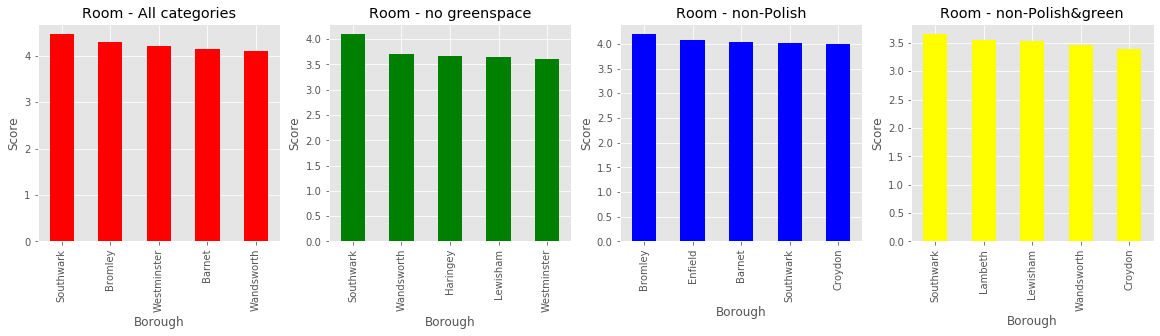

In [83]:
fig = plt.figure() 
ax0 = fig.add_subplot(1, 4, 1) 
ax1 = fig.add_subplot(1, 4, 2) 
ax2 = fig.add_subplot(1, 4, 3) 
ax3 = fig.add_subplot(1, 4, 4) 

# Subplot 1: Box plot

fig1=Boro_merged[['score_room','Area']].sort_values('score_room', ascending=False).head()
fig1.plot(kind='bar', color='red',  x='Area', y='score_room',  figsize=(20, 4), ax=ax0).get_legend().remove()
ax0.set_title('Room - All categories')
ax0.set_xlabel('Borough')
ax0.set_ylabel('Score')


# Subplot 2
fig2=Boro_merged[['score_room_no_green','Area']].sort_values('score_room_no_green', ascending=False).head()

fig2.plot(kind='bar', color='green',  x='Area', y='score_room_no_green', figsize=(20, 4), ax=ax1).get_legend().remove()
ax1.set_title('Room - no greenspace')
ax1.set_xlabel('Borough')
ax1.set_ylabel('Score')

# Subplot 3
fig3=Boro_merged[['score_room_no_polish','Area']].sort_values('score_room_no_polish', ascending=False).head()

fig3.plot(kind='bar', color='blue',  x='Area', y='score_room_no_polish', figsize=(20, 4), ax=ax2).get_legend().remove()
ax2.set_title('Room - non-Polish')
ax2.set_xlabel('Borough')
ax2.set_ylabel('Score')

# Subplot 3
fig4=Boro_merged[['score_room_no_polish&Green','Area']].sort_values('score_room_no_polish&Green', ascending=False).head()

fig4.plot(kind='bar', color='yellow',  x='Area', y='score_room_no_polish&Green', figsize=(20, 4), ax=ax3).get_legend().remove()
ax3.set_title('Room - non-Polish&green')
ax3.set_xlabel('Borough')
ax3.set_ylabel('Score')

plt.show()


#### In few categories Southwark is the winner, therefore I'll propose to my friend to search there place to live

### Appendix

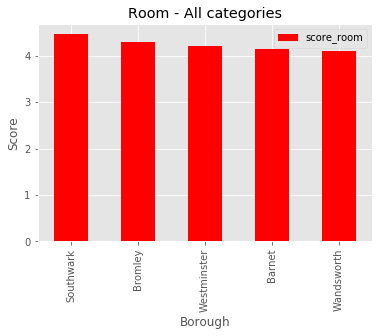

In [84]:
#

fig1=Boro_merged[['score_room','Area']].sort_values('score_room', ascending=False).head()
fig1.plot(kind='bar', color='red',  x='Area', y='score_room',  figsize=(6, 4))
plt.title('Room - All categories')
plt.xlabel('Borough')
plt.ylabel('Score')

plt.show()

In [86]:
import seaborn as sn

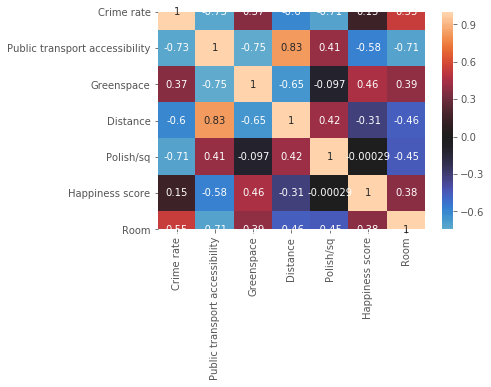

In [87]:
corrMatrix = Boro_merged[['Crime rate',  'Public transport accessibility', 'Greenspace', 'Distance', 'Polish/sq', 'Happiness score', 'Room', 'Area']].corr()
sn.heatmap(corrMatrix, annot=True, center=0)

In [88]:
Boro_merged['score_room_no_polish2']=Boro_merged['Room']+Boro_merged['Crime rate']+2*Boro_merged['Public transport accessibility']+Boro_merged['Happiness score']+Boro_merged['Greenspace']+Boro_merged['Distance']


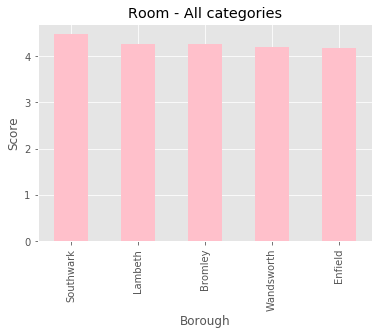

In [89]:
fig1=Boro_merged[['score_room_no_polish2','Area']].sort_values('score_room_no_polish2', ascending=False).head()
fig1.plot(kind='bar', color='pink',  x='Area', y='score_room_no_polish2',  figsize=(6, 4)).get_legend().remove()
plt.title('Room - All categories')
plt.xlabel('Borough')
plt.ylabel('Score')

plt.show()

In [92]:
London_borough

,Borough,Latitude,Longitude,Distance
0,City of London,51.515556,-0.092222,2.943510
1,Barking and Dagenham,51.560833,0.155833,30.962427
2,Barnet,51.625278,-0.151667,13.356893
3,Bexley,51.455000,0.150556,30.469702
4,Brent,51.558889,-0.281667,18.976051
5,Bromley,51.403889,0.019722,19.319056
6,Camden,51.528889,-0.125556,2.270902
7,Croydon,51.371389,-0.097778,15.552845
8,Ealing,51.513056,-0.308889,21.205290
9,Enfield,51.653889,-0.080000,16.554964
